# HW3 Analysis of Music and Mental Health Survey

### Author: Joseph Wong

This notebook uses data from the Kaggle 'Music & Mental Health Survey Results' data set:

https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

It was accessed on (9/10/2025).

Data set was created by Catherine Rasgaitis. Data collection was performed through a Google Form posted on social media platforms and advertised on posters and cards in public locations. It is under the CC0: Public Domain license.

The original dataset had 736 observations and 33 variables.

## Goal: Understand potential correlation between music listening habits and mental health

The goal of this notebook is to understand if or how there is a correlation between music listening habits and mental health. This is an initial exploratory data exploration.

Since they do not pertain to this specific topic, the following variables have been dropped from the original data set:

    'Timestamp', 'Primary streaming service', 'Instrumentalist', 'Composer', 'Permissions'

The data is saved in the file:

    'mxmh_survey_results.csv'

## Importing packages and the data set

In [3]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("catherinerasgaitis/mxmh-survey-results")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\josee\.cache\kagglehub\datasets\catherinerasgaitis\mxmh-survey-results\versions\1


In [5]:
path = '/Users/josee/.cache/kagglehub/datasets/catherinerasgaitis/mxmh-survey-results/versions/1/'
os.listdir(path)

['mxmh_survey_results.csv']

In [6]:
file = path+'mxmh_survey_results.csv'
df_raw = pd.read_csv(file)
df = df_raw.drop(columns=['Timestamp','Primary streaming service','Instrumentalist','Composer','Permissions'])
df

,Age,Hours per day,While working,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,1.5,Yes,Rock,Yes,No,119.0,Sometimes,Never,Never,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,4.0,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,Yes,R&B,Yes,No,107.0,Never,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,Yes,Rock,Yes,Yes,120.0,Very frequently,Rarely,Never,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,1.0,Yes,Pop,Yes,Yes,160.0,Rarely,Rarely,Never,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,6.0,Yes,Rap,Yes,No,120.0,Rarely,Sometimes,Sometimes,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,5.0,Yes,Classical,No,No,170.0,Very frequently,Never,Never,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


## About the data

In [7]:
df.shape

(736, 28)

There are 736 observations and 28 variables in the data set.

### Variables

In [8]:
df.keys()

Index(['Age', 'Hours per day', 'While working', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')

In [10]:
df.dtypes

Age                             float64
Hours per day                   float64
While working                    object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object
Frequency [Video game music]     object
Anxiety                         float64
Depression                      float64


- Categorical (all are strings)
    - 'While working': Does the respondent listen to music while studying/working?
    - 'Fav genre': Respondent's favorite or top genre
    - 'Exploratory': Does the respondent actively explore new artists/genres?
    - 'Foreign languages': Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
    - 'Frequency ["genre"]': How frequently the respondent listens to a specified genre of music (Never, Rarely, Sometimes, Very frequently)
    - 'Music effects': Does music improve/worsen respondent's mental health conditions? (Improve, No effect, Worsen) **(this is based on respondent's subjective opinion on how music affected their mental health conditions)**

- Numerical (all are floats)
    - 'Age': Respondent's age
    - 'Hours per day': Number of hours the respondent listens to music per day
    - 'BPM': Beats per minute of favorite genre
    - 'Anxiety': Self-reported anxiety, on a scale of 0-10
    - 'Depression': Self-reported depression, on a scale of 0-10
    - 'Insomnia': Self-reported insomnia, on a scale of 0-10
    - 'OCD': Self-reported OCD, on a scale of 0-10

### NaNs

In [20]:
df.isna().sum()

Age                               1
Hours per day                     0
While working                     3
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                        0
Insomnia                          0
OCD                               0
Music effects               

In [25]:
mask = (df['Age'].isna()) | (df['While working'].isna()) | (df['Foreign languages'].isna()) | (df['Music effects'].isna())
df[mask]

,Age,Hours per day,While working,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,1.5,Yes,Rock,Yes,No,119.0,Sometimes,Never,Never,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
12,NaN,3.0,Yes,Hip hop,Yes,Yes,NaN,Rarely,Never,Rarely,...,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve
57,42.0,0.0,NaN,Rock,No,Yes,NaN,Rarely,Rarely,Never,...,Rarely,Rarely,Never,Sometimes,Sometimes,9.0,0.0,10.0,0.0,No effect
161,18.0,2.0,Yes,K pop,No,Yes,122.0,Rarely,Never,Never,...,Very frequently,Sometimes,Never,Never,Never,0.0,2.0,0.0,0.0,NaN
168,19.0,3.0,Yes,K pop,Yes,Yes,114.0,Sometimes,Never,Never,...,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,8.0,9.0,6.0,0.0,NaN
235,31.0,2.0,No,Metal,Yes,NaN,95.0,Sometimes,Sometimes,Sometimes,...,Very frequently,Rarely,Sometimes,Very frequently,Sometimes,7.0,6.0,6.0,5.0,Improve
338,21.0,2.0,Yes,EDM,No,Yes,NaN,Rarely,Rarely,Very frequently,...,Sometimes,Rarely,Rarely,Sometimes,Very frequently,10.0,10.0,5.0,7.0,NaN
396,14.0,1.5,No,Classical,Yes,NaN,140.0,Very frequently,Never,Never,...,Never,Never,Never,Rarely,Sometimes,1.0,2.0,4.0,3.0,Improve
426,30.0,13.0,NaN,K pop,Yes,Yes,145.0,Sometimes,Never,Rarely,...,Very frequently,Very frequently,Sometimes,Very frequently,Sometimes,10.0,10.0,10.0,7.0,Improve


The following columns contain a few number of NaNs: 'Age', 'While working', 'Foreign languages', 'Music effects'. The observations that contain the NaNs in these columns appear to contain data for most other variables. Therefore, these NaNs will are not likely to significantly alter the data set (because they are not frequent) and the observations may contain data that will contribute to other variables. So, we will keep the observations with NaNs in the data set.

In [23]:
df[df['BPM'].isna()]

,Age,Hours per day,While working,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
10,18.0,3.0,Yes,Country,Yes,No,NaN,Never,Very frequently,Never,...,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect
12,NaN,3.0,Yes,Hip hop,Yes,Yes,NaN,Rarely,Never,Rarely,...,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve
15,17.0,2.0,No,Pop,Yes,Yes,NaN,Rarely,Rarely,Never,...,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen
30,20.0,5.0,Yes,Rock,Yes,Yes,NaN,Never,Rarely,Rarely,...,Sometimes,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve
32,19.0,6.0,Yes,Metal,Yes,Yes,NaN,Never,Never,Never,...,Sometimes,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,18.0,4.0,Yes,R&B,No,No,NaN,Never,Rarely,Never,...,Sometimes,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect
700,20.0,1.0,Yes,Pop,No,Yes,NaN,Sometimes,Rarely,Rarely,...,Very frequently,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen
706,23.0,1.0,Yes,Rock,Yes,Yes,NaN,Rarely,Rarely,Sometimes,...,Very frequently,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve
712,23.0,3.0,Yes,Rock,No,No,NaN,Never,Never,Never,...,Sometimes,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve


The 'BPM' column had 107 NaNs. The form used for data collection left "harder" questions optional (including 'BPM') to encourage respondents to finish the survey. This may account for the decently large number of NaNs. The observations with NaNs for the 'BPM' variable appear to have values for other variables. So, in regard to other variables, these NaNs are not likely to alter the analysis. However, in regard to 'BPM', analysis should have further considerations because it has fewer observations with values.

### Other potential issues with the data

In [35]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


Overall, the numerical variables seem to have values that would fit the logical range of their scope (i.e. 'Hours per day' ranges from 0 to 24 hours). However, we will perform futher analysis on the 'BPM' variable because the max (1.000000e+09) seems highly illogical as a value.

In [41]:
print("min:",df['BPM'].min())
print("max:",df['BPM'].max())

min: 0.0
max: 999999999.0


In [46]:
df['BPM'].sort_values(ascending=False).head()

568    999999999.0
644          624.0
610          220.0
248          220.0
662          218.0
Name: BPM, dtype: float64

The observation with a 'BPM' of 999999999 seems to be an illogical value and should not be considered a valid data point. Having a 'BPM' of 624 is possible, but still seems far outside the cluster of other data points. Therefore, to avoid analysis being skewed by these outliers, we will replace these data points with NaNs.

In [79]:
# assign all 'BPM' values greater than 300 to be NaN
df.loc[df['BPM']>300, 'BPM'] = np.nan

In [80]:
# verify 'BPM' is set to NaN
df.iloc[568]

Age                                         16.0
Hours per day                                7.0
While working                                Yes
Fav genre                       Video game music
Exploratory                                  Yes
Foreign languages                             No
BPM                                          NaN
Frequency [Classical]                      Never
Frequency [Country]                       Rarely
Frequency [EDM]                        Sometimes
Frequency [Folk]                          Rarely
Frequency [Gospel]                         Never
Frequency [Hip hop]                       Rarely
Frequency [Jazz]                          Rarely
Frequency [K pop]                          Never
Frequency [Latin]                          Never
Frequency [Lofi]                           Never
Frequency [Metal]                Very frequently
Frequency [Pop]                        Sometimes
Frequency [R&B]                            Never
Frequency [Rap]     

In [81]:
df['BPM'].describe()

count    627.000000
mean     122.625199
std       33.905830
min        0.000000
25%      100.000000
50%      120.000000
75%      143.500000
max      220.000000
Name: BPM, dtype: float64

When observing the 'BPM' variable now, the range of values appears to be within a reasonable range of song BPMs.

## Data Distribution

### Ages

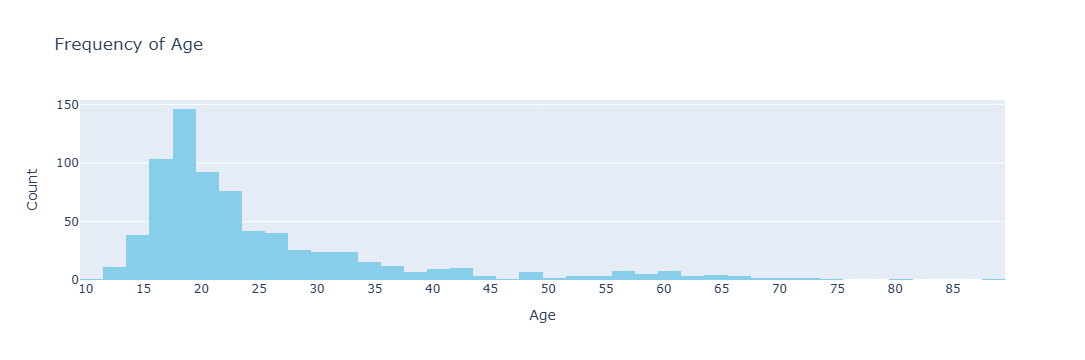

count    735.000000
mean      25.206803
std       12.054970
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       89.000000
Name: Age, dtype: float64


In [160]:
my_cols = 'Age'
fig = px.histogram(df[my_cols],
                   color_discrete_sequence=['skyblue'],
                   nbins=40,
                   title="Frequency of "+my_cols)
fig.update_layout(xaxis_title=my_cols,
                  yaxis_title="Count",
                  showlegend=False,
                  xaxis=dict(dtick=5))
fig.show()
print(df[my_cols].describe())

The ages peak at 18-19, with 146 observations there. The median is 21. The min is 10 and the max is 89. The graph suggests teens and young adults (ages 16-25) are more well represented by the data.

### Hours per day

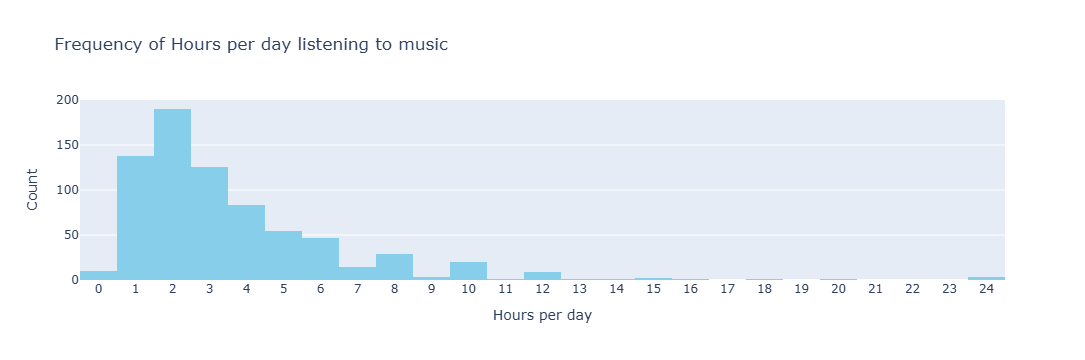

count    736.000000
mean       3.572758
std        3.028199
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       24.000000
Name: Hours per day, dtype: float64


In [161]:
my_cols = 'Hours per day'
fig = px.histogram(df[my_cols],
                   color_discrete_sequence=['skyblue'],
                   nbins=25,
                   title="Frequency of "+my_cols+" listening to music")
fig.update_layout(xaxis_title=my_cols,
                  yaxis_title="Count",
                  showlegend=False,
                  xaxis=dict(dtick=1))
fig.show()
print(df[my_cols].describe())

The hours listening to music per day peaks at 1.5-2.4 hours per day, with 190 observations there. The median is 3 hours. The min is 0 and the max is 24. The graph suggests the observations are most frequent from 0.5 to 4.4 hours per day.

### Mental Health

#### Anxiety

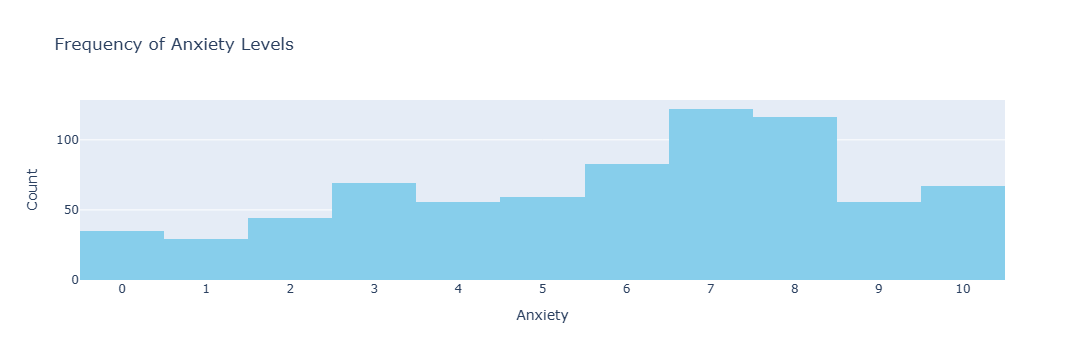

count    736.000000
mean       5.837636
std        2.793054
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Anxiety, dtype: float64


In [162]:
my_cols = 'Anxiety'
fig = px.histogram(df[my_cols],
                   color_discrete_sequence=['skyblue'],
                   nbins=11,
                   title="Frequency of "+my_cols+" Levels")
fig.update_layout(xaxis_title=my_cols,
                  yaxis_title="Count",
                  showlegend=False,
                  xaxis=dict(dtick=1))
fig.show()
print(df[my_cols].describe())

The anxiety levels peak at level 7, with 122 observations there. But level 8 is very close, with 116 observations. The median is level 6. The min is 0 and the max is 10. The graph suggests the observations are most frequent from level 6 to 8.

#### Depression

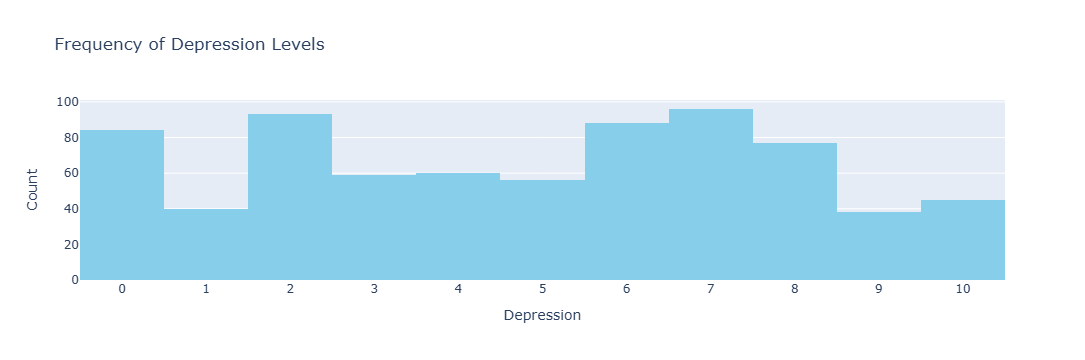

count    736.000000
mean       4.796196
std        3.028870
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: Depression, dtype: float64


In [163]:
my_cols = 'Depression'
fig = px.histogram(df[my_cols],
                   color_discrete_sequence=['skyblue'],
                   nbins=11,
                   title="Frequency of "+my_cols+" Levels")
fig.update_layout(xaxis_title=my_cols,
                  yaxis_title="Count",
                  showlegend=False,
                  xaxis=dict(dtick=1))
fig.show()
print(df[my_cols].describe())

The depression levels peak at level 7, with 96 observations there. But level 2 is very close, with 93 observations. The median is level 5. The min is 0 and the max is 10. The graph suggests there is not an obvious shape to the frequency. It is distributed fairly evenly, although fewer observations reported levels 1, 9, and 10.

#### Insomnia

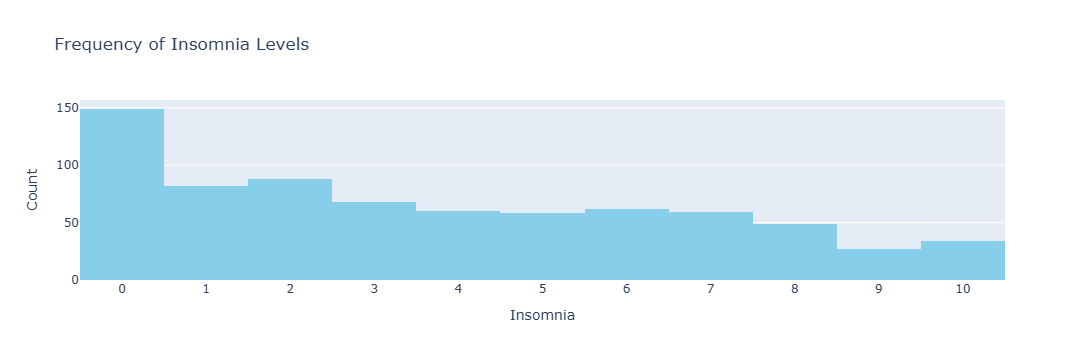

count    736.000000
mean       3.738451
std        3.088689
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       10.000000
Name: Insomnia, dtype: float64


In [164]:
my_cols = 'Insomnia'
fig = px.histogram(df[my_cols],
                   color_discrete_sequence=['skyblue'],
                   nbins=11,
                   title="Frequency of "+my_cols+" Levels")
fig.update_layout(xaxis_title=my_cols,
                  yaxis_title="Count",
                  showlegend=False,
                  xaxis=dict(dtick=1))
fig.show()
print(df[my_cols].describe())

The insomnia levels peak at level 0, with 149 observations there. The median is level 3. The min is 0 and the max is 10. The graph suggests the observations are most frequent at level 0, then decrease in frequency as insomnia level increases, for the most part.

#### OCD

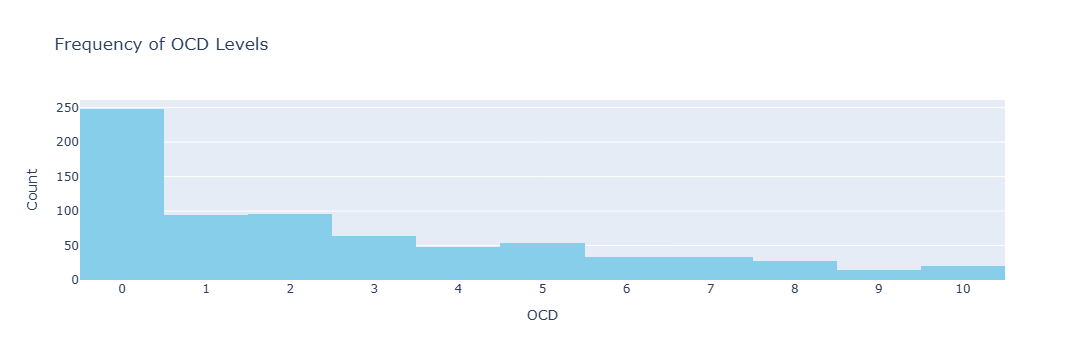

count    736.000000
mean       2.637228
std        2.842017
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       10.000000
Name: OCD, dtype: float64


In [165]:
my_cols = 'OCD'
fig = px.histogram(df[my_cols],
                   color_discrete_sequence=['skyblue'],
                   nbins=11,
                   title="Frequency of "+my_cols+" Levels")
fig.update_layout(xaxis_title=my_cols,
                  yaxis_title="Count",
                  showlegend=False,
                  xaxis=dict(dtick=1))
fig.show()
print(df[my_cols].describe())

The insomnia levels peak at level 0, with 248 observations there. The median is level 2. The min is 0 and the max is 10. The graph suggests the observations are most frequent at level 0, then decrease in frequency as OCD level increases, for the most part.

### Listen to Music While Working

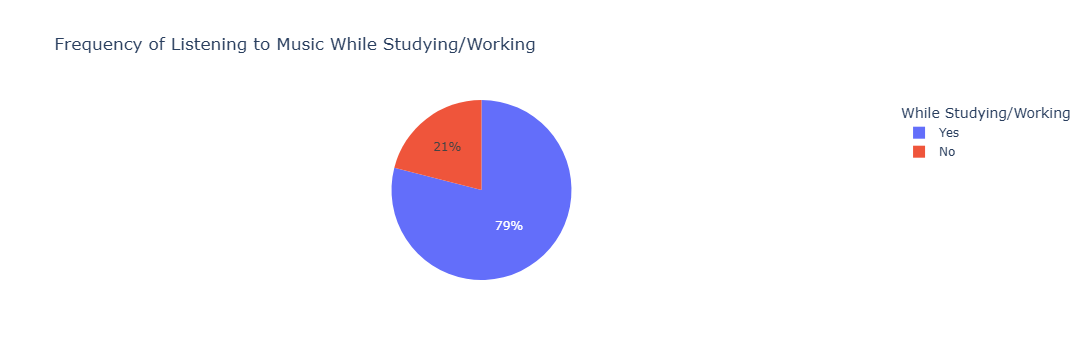

In [190]:
my_cols = 'While working'
fig = px.pie(df[my_cols].dropna(),
             names=my_cols,
             title="Frequency of Listening to Music While Studying/Working")
fig.update_layout(legend_title_text="While Studying/Working")
fig.show()

The majority of observations listen to music while studying/working (79%). 

### Favorite Genre

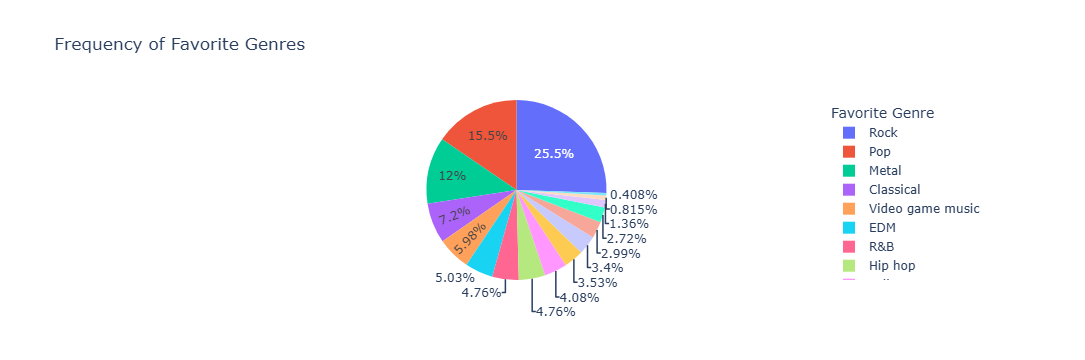

In [184]:
my_cols = 'Fav genre'
fig = px.pie(df[my_cols].dropna(),
             names=my_cols,
             title="Frequency of Favorite Genres")
fig.update_layout(legend_title_text="Favorite Genre")
fig.show()

The most frequent favorite genre is rock (25.5%). The least frequent genre is Latin (0.408%). The top three genres (rock, pop, metal) account for more than half of the observations (25.5%, 15.5%, 12% respectively).

### Exploratory

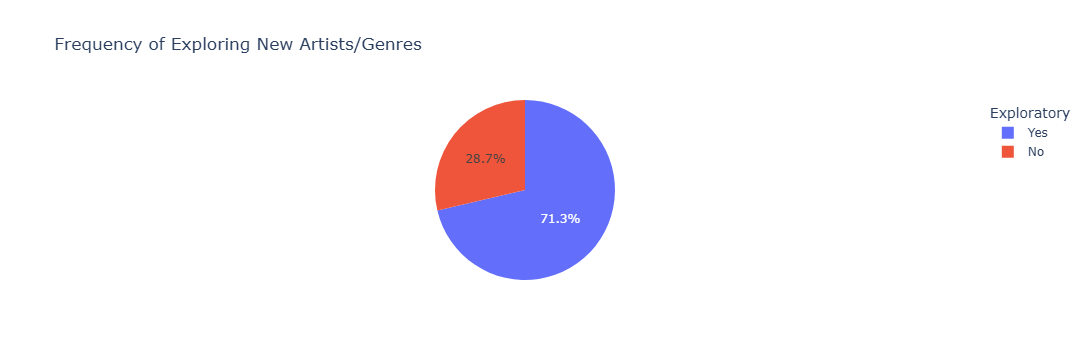

In [185]:
my_cols = 'Exploratory'
fig = px.pie(df[my_cols].dropna(),
             names=my_cols,
             title="Frequency of Exploring New Artists/Genres")
fig.update_layout(legend_title_text=my_cols)
fig.show()

The majority of observations actively explore new artists and genres (71.3%).

### Foreign Languages

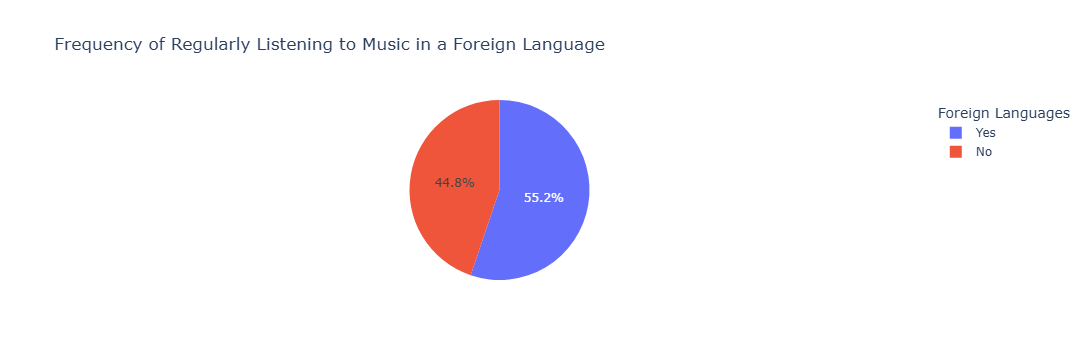

In [188]:
my_cols = 'Foreign languages'
fig = px.pie(df[my_cols].dropna(),
             names=my_cols,
             title="Frequency of Regularly Listening to Music in a Foreign Language")
fig.update_layout(legend_title_text="Foreign Languages")
fig.show()

A slight majority of observations regularly listen to music in a foreign language (55.2%).

### Music Effects

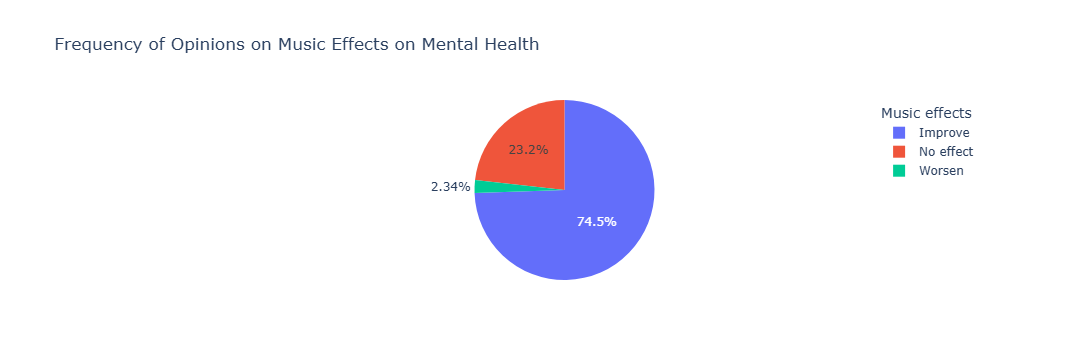

In [189]:
my_cols = 'Music effects'
fig = px.pie(df[my_cols].dropna(),
             names=my_cols,
             title="Frequency of Opinions on Music Effects on Mental Health")
fig.update_layout(legend_title_text=my_cols)
fig.show()

The majority of observations reported that listening to music improves their mental health (74.5%). A very small minority of observations reported that listening to music worsened their mental health (2.34%).

## Is there a potential correlation between music listening habits and mental health?

### Favorite Genre

#### Clean up data

In [266]:
df['Fav genre'].value_counts()

Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
Hip hop              35
R&B                  35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64

Some categories of favorite genres have very low value counts. Having a small sample size for an individual genre will make its analysis less applicable and reliable. Therefore, we will drop genres with value counts less than 30.

In [280]:
# create list of valid genres with value counts greater than or equal to 30
valid_genres = df['Fav genre'].value_counts()[lambda x: x>=30].index
# only keep rows that have favorite genres in the valid genres list
df = df[df['Fav genre'].isin(valid_genres)]
# verify less frequent genres are gone
df['Fav genre'].value_counts()

Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
Name: count, dtype: int64

#### Anxiety

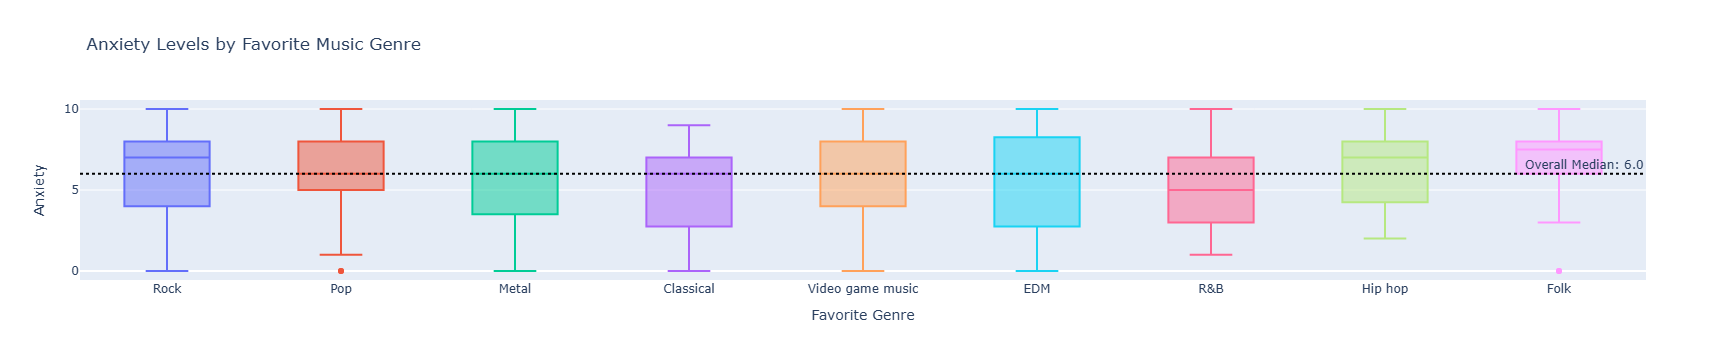

In [295]:
fig = px.box(df,
             x='Fav genre',
             y='Anxiety',
             color='Fav genre',
             title="Anxiety Levels by Favorite Music Genre",
             category_orders={"Fav genre": df['Fav genre'].value_counts().index})
fig.update_layout(xaxis_title="Favorite Genre",
                  showlegend=False)
# add horizontal line for overall median
median = df['Anxiety'].median()
fig.add_hline(y=median,
              line_dash='dot',
              line_color='black',
              annotation_text="Overall Median: "+str(median),
              annotation_position='top right')
fig.show()

To determine a correlation between music genre and anxiety levels, we will compare each genre's median anxiety level and compare it to the overall median of the sample. Rock, hip hop, and folk have greater medians; pop, metal, classical, video game music, and EDM have equal medians; and R&B has a lower median. This suggests that certain favorite music genres may correlate with listeners' anxiety levels. Next, we will analyzing the spread of anxiety levels in certain genres. Genres with smaller interquartile ranges could potentially have a stronger correlation to a certain anxiety level (i.e. their median). Most apparently, pop and folk have smaller interquartile ranges compared to other genres. So, this suggests respondents with pop music as their favorite genre may be more likely to report anxiety levels near 6 and respondents with folk music as their favorite genre may be more likely to report anxiety levels near 7.5.

#### Depression

In [290]:
df["Depression"].median()

5.0

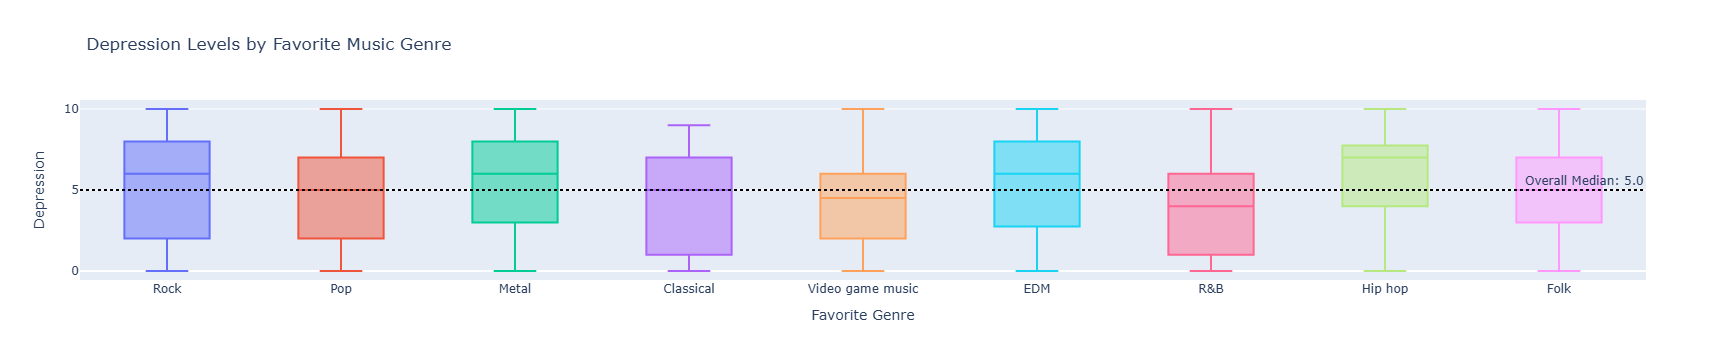

In [296]:
fig = px.box(df,
             x='Fav genre',
             y='Depression',
             color='Fav genre',
             title="Depression Levels by Favorite Music Genre",
             category_orders={"Fav genre": df['Fav genre'].value_counts().index})
fig.update_layout(xaxis_title="Favorite Genre",
                  showlegend=False)
# add horizontal line for overall median
median = df['Depression'].median()
fig.add_hline(y=median,
              line_dash='dot',
              line_color='black',
              annotation_text="Overall Median: "+str(median),
              annotation_position='top right')
fig.show()

To determine a correlation between music genre and depression levels, we will compare each genre's median depression level and compare it to the overall median of the sample. Rock, metal, EDM, and hip hop have greater medians; pop, classical, and folk have equal medians; and video game music and R&B have lower medians. This suggests that certain favorite music genres may correlate with listeners' depression levels. Next, we will analyzing the spread of depression levels in certain genres. Genres with smaller interquartile ranges could potentially have a stronger correlation to a certain depression level (i.e. their median). Most of the genres have similar interquartile ranges, so they most likely have similar correlation strength. Notably, video game music and hip hop seem to have smaller interquartile ranges, suggesting a higher likelihood of respondents reporting depression levels closer to 4.5 or 7, respectively.

## Conclusion

After analyzing both anxiety and depression levels in relation to favorite music genres, we can conclude that there is a potential correlation between favorite music genre and mental health. Some genres, such as rock and hip hop, reported higher anxiety and depression levels than the sample average. This suggests these genres may be correlated with worse mental health levels. Other genres, like R&B, reported lower anxiety and depression levels than the sample average. This suggests these genres may be correlated with better mental health levels. As stated in the introduction, this is an intial data exploration. So, there may be other variables that have correlation with mental health levels or other variables used to measure mental health levels. In conclusion, this sample suggests there is a potential correlation between favorite music genre and mental health.